<h2>Oscar Nominees | 1927 - 2023</h2>

<p>This is an exploratory analysis of the Oscard Award Nominees, from 1927 to 2023.</p>

In [171]:
#importing libraries

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
#reading in the csv file
data = pd.read_csv("the_oscar_award.csv")

In [175]:
#checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


In [177]:
#number of columns and rows in the dataset
data.shape

(10889, 7)

In [179]:
#checking the first rows
data.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [181]:
#checking the last rows
data.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True
10888,2023,2024,96,HONORARY AWARD,"To Carol Littleton, whose commitment to her cr...",NaN,True


In [183]:
#looking for duplicates
data.duplicated().values.any()

True

In [185]:
#dropping duplicated values
data = data.drop_duplicates()

In [187]:
data.duplicated().sum()

0

In [189]:
#looking for NaN values
data.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             318
winner             0
dtype: int64

NaN values are mostly in the "film" column, which is understandable due to the fact that not every nomination is a film.

In [192]:
#number of categories
data.category.nunique()

115

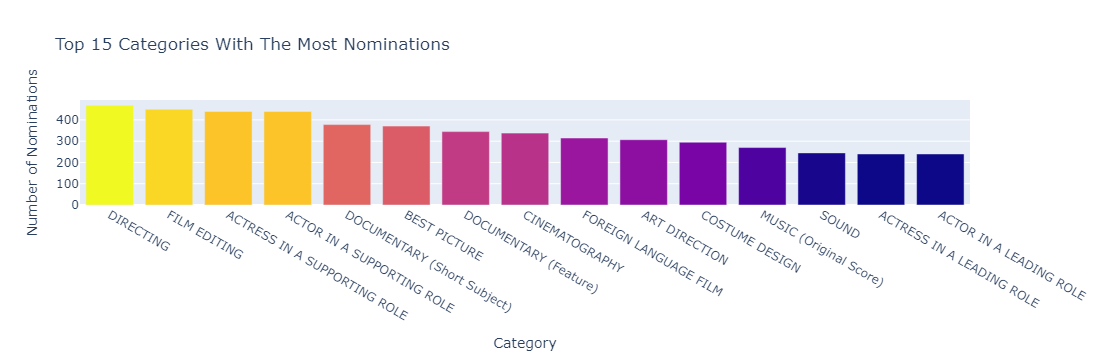

In [202]:
#bar chart visualizing the top 15 categories with the most nominations
nominees_per_category = data.category.value_counts()[:15]
v_bar = px.bar(
        x = nominees_per_category.index,
        y = nominees_per_category.values,
        color = nominees_per_category.values,
        color_continuous_scale='Plasma',
        title='Top 15 Categories With The Most Nominations')

v_bar.update_layout(xaxis_title='Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Nominations')
v_bar.show()

In [204]:
#creating a table with only the winners
winners = data[data["winner"] == True]

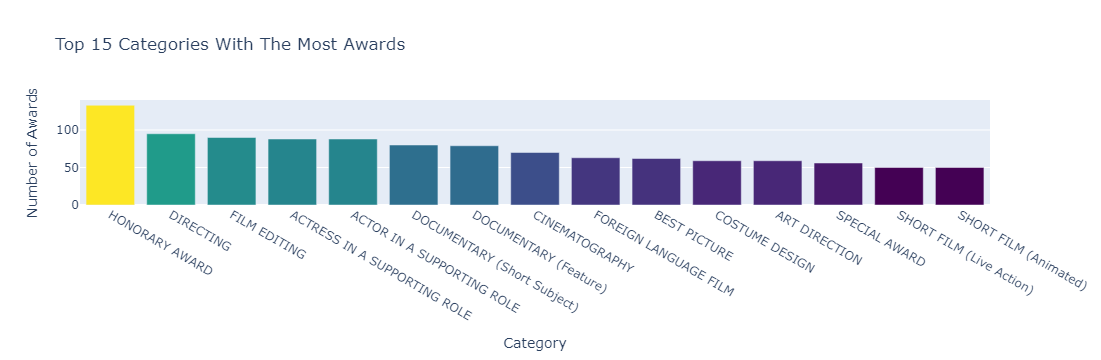

In [206]:
#visualizing the top 15 categories with the most awards won
awards_per_category = winners.category.value_counts()[:15]
v_bar = px.bar(
        x = awards_per_category.index,
        y = awards_per_category.values,
        color = awards_per_category.values,
        color_continuous_scale='Viridis',
        title='Top 15 Categories With The Most Awards')

v_bar.update_layout(xaxis_title='Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Awards')
v_bar.show()

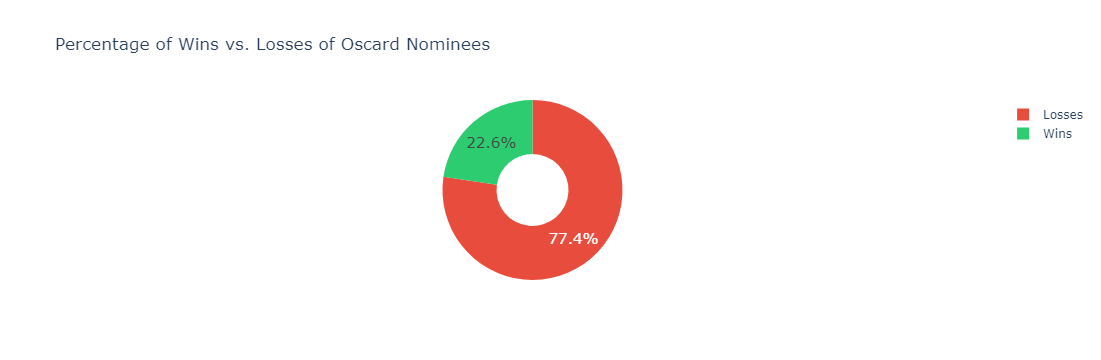

In [208]:
#pie chart for the percentage of wins and losses along the nominees

wins = data.winner.value_counts()

label_mapping = {True: "Wins", False: "Losses"}
mapped_labels = wins.index.map(label_mapping)

fig = px.pie(labels=mapped_labels, 
             values=wins.values,
             title="Percentage of Wins vs. Losses of Oscard Nominees",
             names=mapped_labels,
             hole=0.4,
            color_discrete_sequence=['#E74C3C', '#2ECC71'])

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

In [210]:
#checking the awards won per year
awards_per_year = winners.groupby(by='year_ceremony').count().winner
awards_per_year

year_ceremony
1928    15
1929     7
1930     8
1931     9
1932    14
        ..
2020    28
2021    24
2022    27
2023    29
2024    27
Name: winner, Length: 96, dtype: int64

In [212]:
#creating a 5 year rolling average of the number of wins
moving_average = awards_per_year.rolling(window=5).mean()

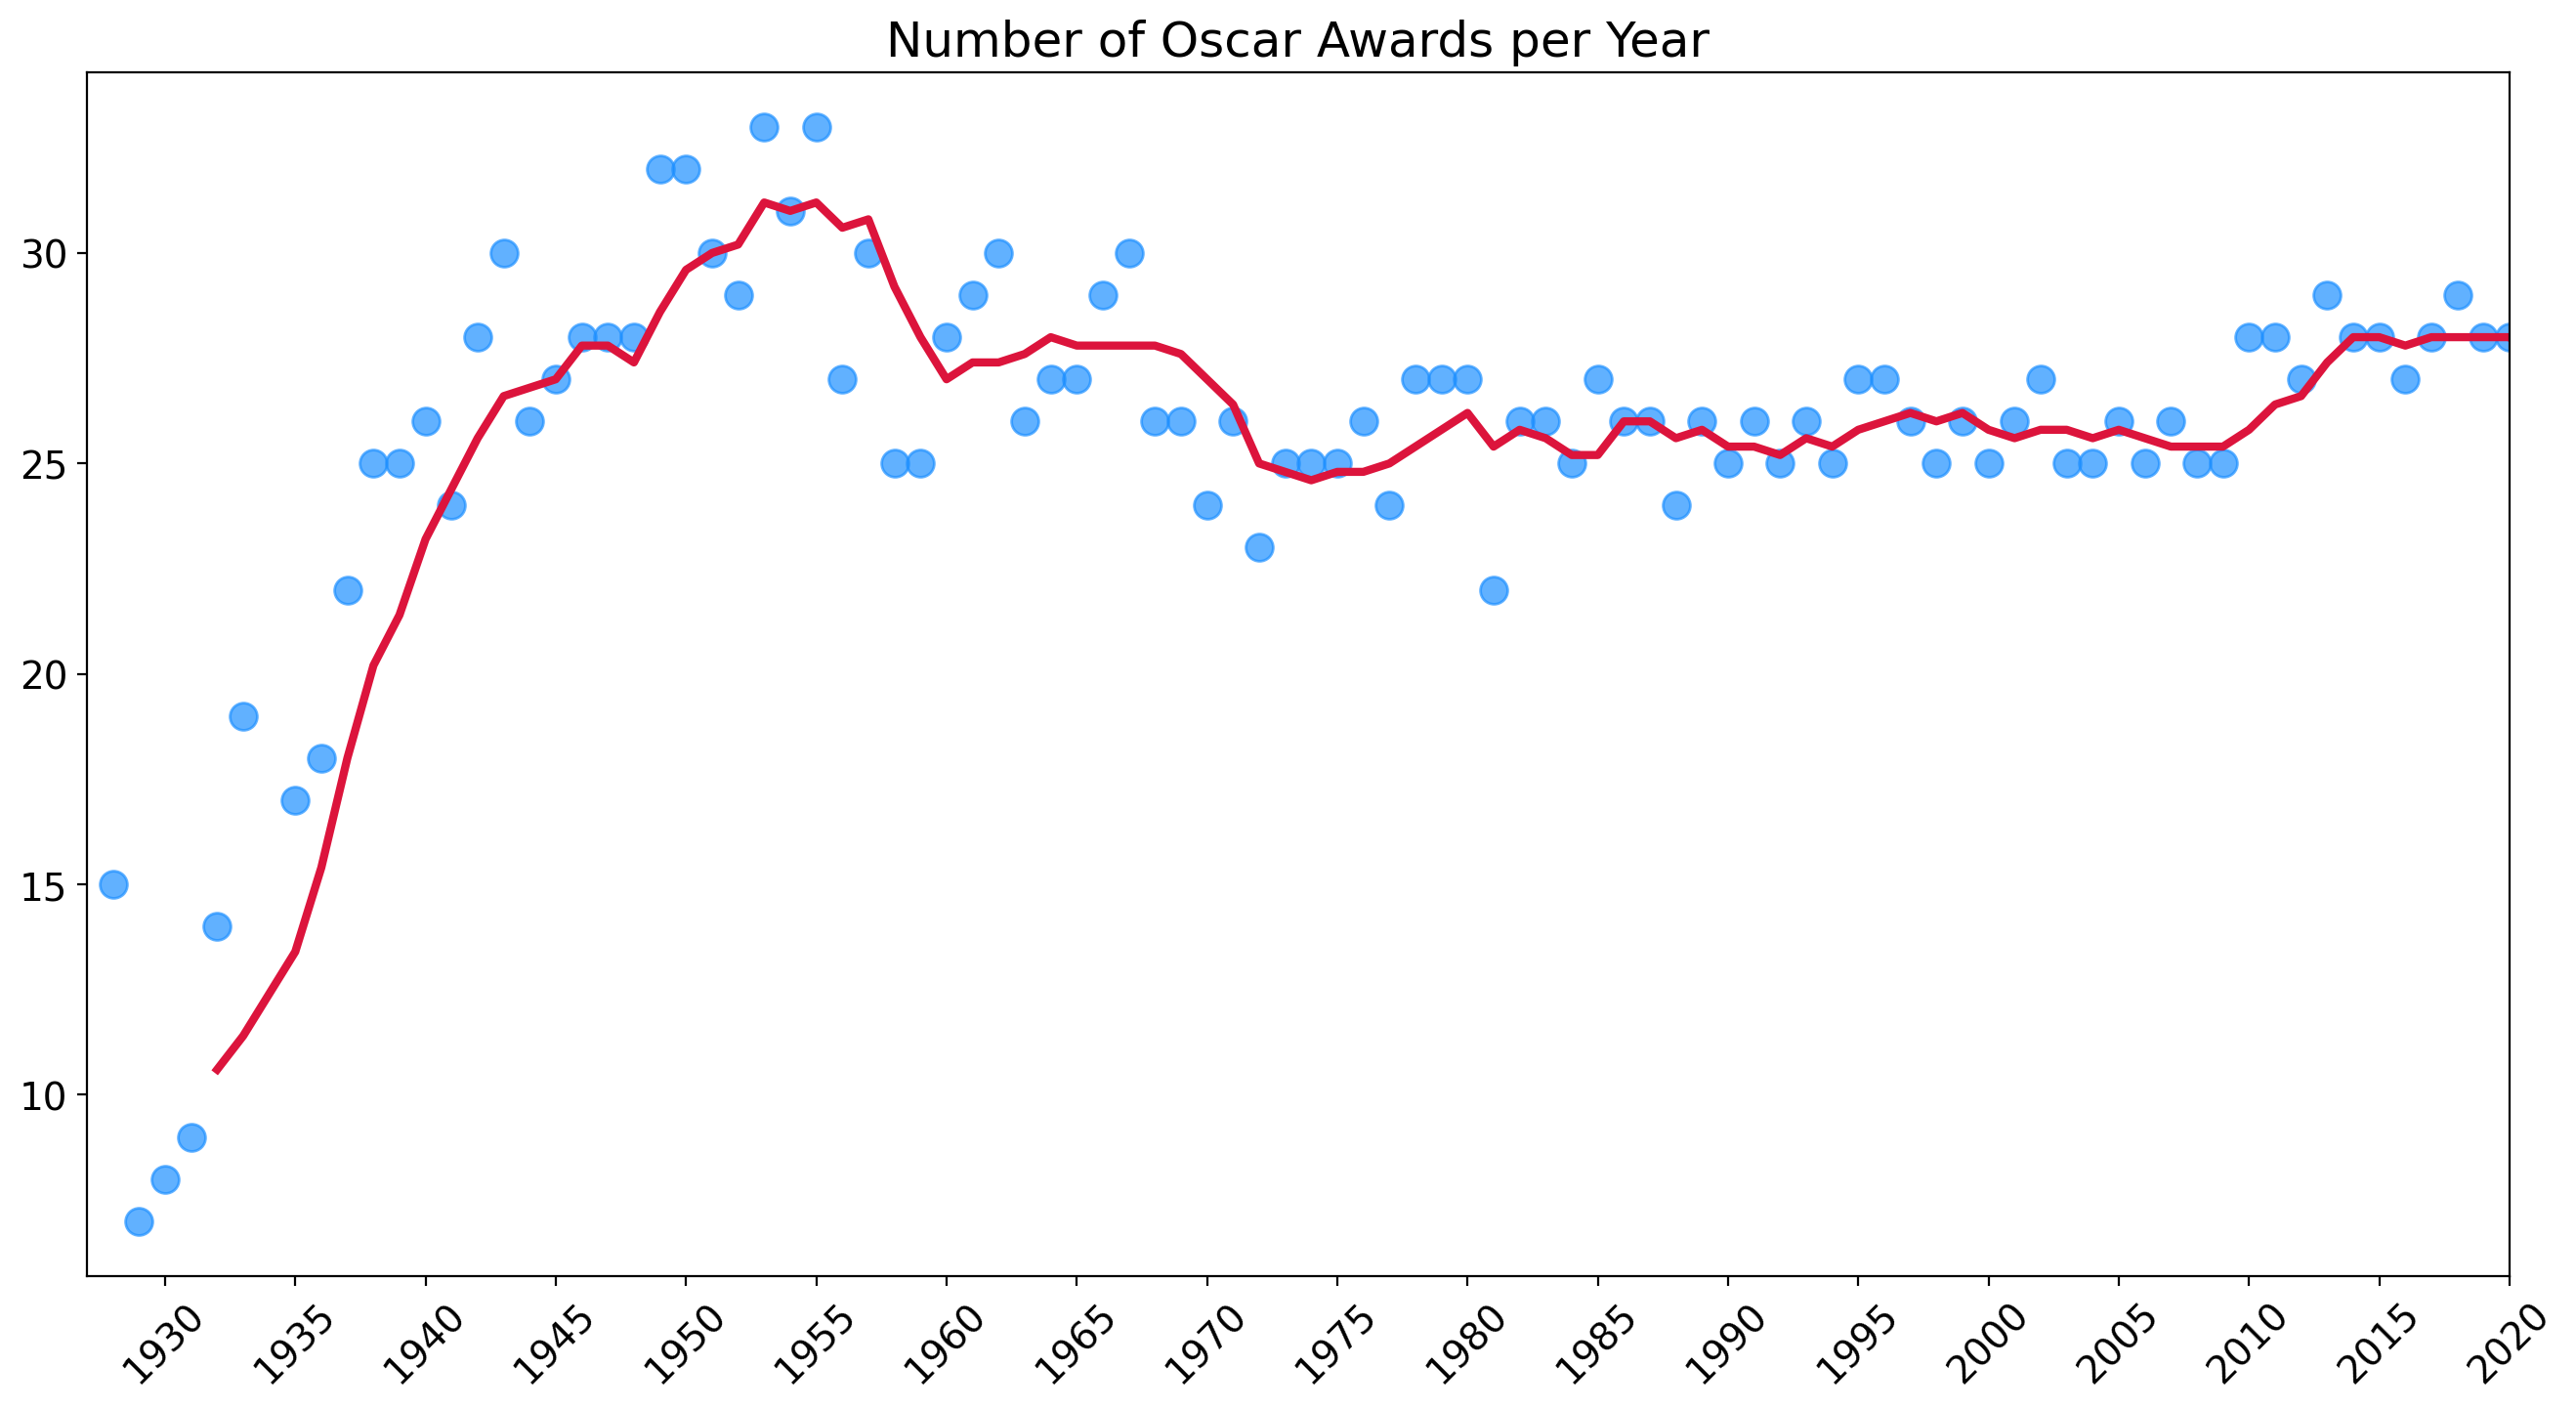

In [214]:
#plotting the number of awards per year
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Oscar Awards per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax = plt.gca()
ax.set_xlim(1927, 2020)

ax.scatter(x=awards_per_year.index, 
           y=awards_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(awards_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()